<h1 style="font-size:40px;">🤖 𝖱𝗈𝖻𝗈𝗍𝗂𝖼𝗌 𝖨𝗇𝖽𝗎𝗌𝗍𝗋𝗒 𝖱𝗈𝖻𝗈𝗍𝗌 𝖠𝖽𝗈𝗉𝗍𝗂𝗈𝗇 𝖯𝗋𝖾𝖽𝗂𝖼𝗍𝗂𝗈𝗇</h1>
This project uses machine learning to predict the adoption of robots in various industries. By analyzing factors like productivity gain, cost savings, and training, we build models to forecast how many robots organizations are likely to deploy. These insights help industries plan their automation strategies more effectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("robotics_industry_data_set_of_50000.csv")

In [3]:
df

,Year,Industry,Robots_Adopted,Productivity_Gain,Cost_Savings,Jobs_Displaced,Training_Hours
0,2016,Electronics,7653,26.03,311.66,3226,183
1,2019,Pharmaceutical,3434,12.52,475.41,1244,396
2,2024,Energy,6952,15.28,362.76,3200,396
3,2021,Energy,7967,5.07,24.15,747,154
4,2022,Electronics,6959,12.86,395.70,279,300
...,...,...,...,...,...,...,...
49995,2019,Logistics,2781,27.56,382.68,953,489
49996,2021,Aerospace,7528,6.46,386.54,784,33
49997,2017,Energy,1099,21.59,51.75,377,55
49998,2019,Electronics,2742,7.18,436.82,742,278


In [4]:
print(df.head())

   Year        Industry  Robots_Adopted  Productivity_Gain  Cost_Savings  \
0  2016     Electronics            7653              26.03        311.66   
1  2019  Pharmaceutical            3434              12.52        475.41   
2  2024          Energy            6952              15.28        362.76   
3  2021          Energy            7967               5.07         24.15   
4  2022     Electronics            6959              12.86        395.70   

   Jobs_Displaced  Training_Hours  
0            3226             183  
1            1244             396  
2            3200             396  
3             747             154  
4             279             300  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               50000 non-null  int64  
 1   Industry           50000 non-null  object 
 2   Robots_Adopted     50000 non-null  int64  
 3   Productivity_Gain  50000 non-null  float64
 4   Cost_Savings       50000 non-null  float64
 5   Jobs_Displaced     50000 non-null  int64  
 6   Training_Hours     50000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.7+ MB
None


In [6]:
print(df.describe())

             Year  Robots_Adopted  Productivity_Gain  Cost_Savings  \
count  50000.0000    50000.000000       50000.000000  50000.000000   
mean    2020.0149     5020.328220          17.532268    250.865484   
std        3.1648     2875.261654           7.237852    144.124519   
min     2015.0000       50.000000           5.000000      1.020000   
25%     2017.0000     2523.750000          11.240000    126.167500   
50%     2020.0000     5037.000000          17.550000    251.310000   
75%     2023.0000     7504.000000          23.860000    375.892500   
max     2025.0000    10000.000000          30.000000    500.000000   

       Jobs_Displaced  Training_Hours  
count    50000.000000    50000.000000  
mean      1252.928740      255.195400  
std       1102.357255      141.709003  
min          0.000000       10.000000  
25%        344.000000      132.000000  
50%        933.000000      256.000000  
75%       1917.000000      378.000000  
max       4975.000000      500.000000  


In [7]:
print(df.isnull().sum())

Year                 0
Industry             0
Robots_Adopted       0
Productivity_Gain    0
Cost_Savings         0
Jobs_Displaced       0
Training_Hours       0
dtype: int64


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "year" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [8]:
df.Robots_Adopted.describe()

count    50000.000000
mean      5020.328220
std       2875.261654
min         50.000000
25%       2523.750000
50%       5037.000000
75%       7504.000000
max      10000.000000
Name: Robots_Adopted, dtype: float64

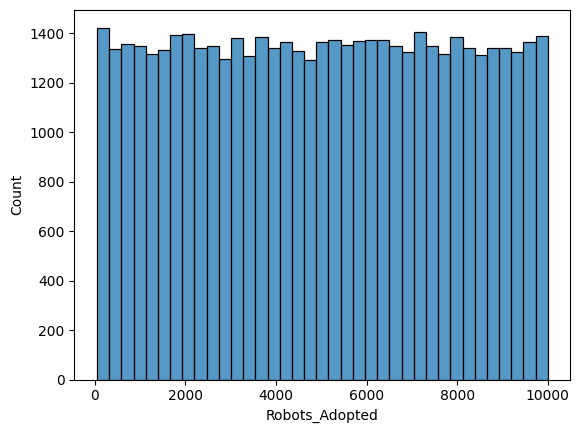

In [9]:
fig = sns.histplot(df,
                   x = 'Robots_Adopted')

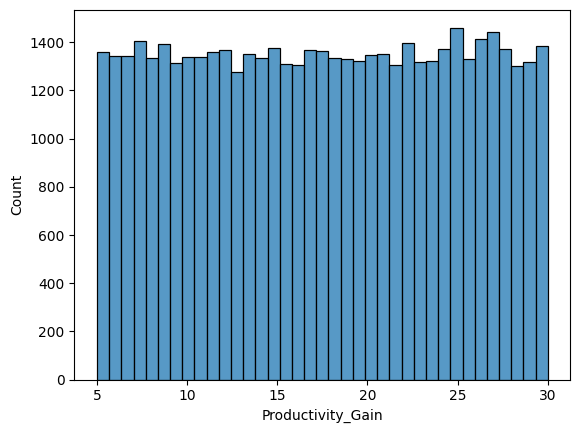

In [10]:
fig = sns.histplot(df,
                   x = 'Productivity_Gain')

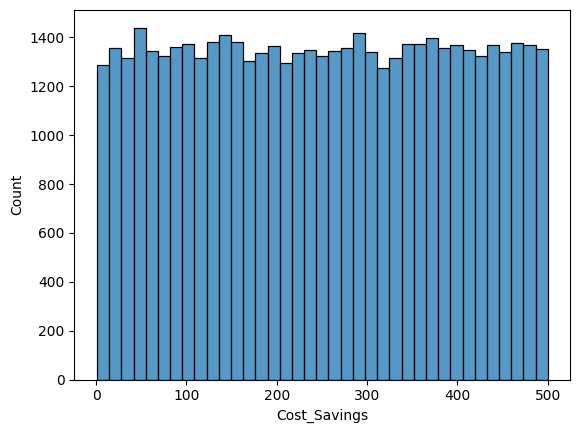

In [11]:
fig = sns.histplot(df,
                   x = 'Cost_Savings')

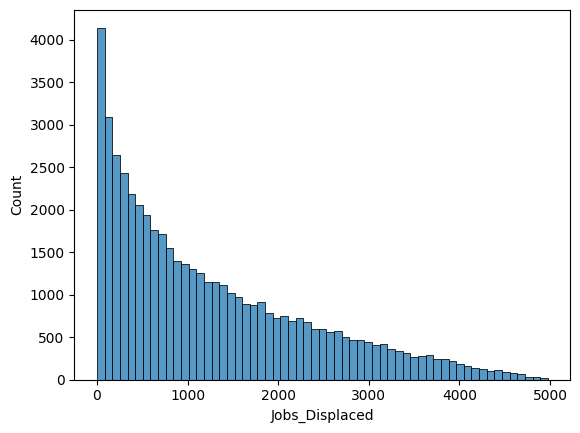

In [12]:
fig = sns.histplot(df,
                   x = 'Jobs_Displaced')

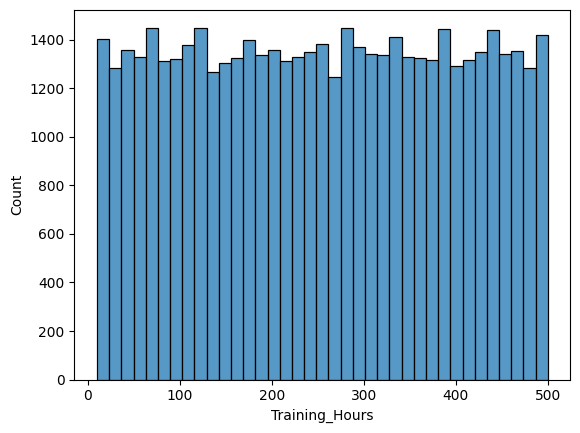

In [13]:
fig = sns.histplot(df,
                   x = 'Training_Hours')

<Axes: xlabel='Year', ylabel='Count'>

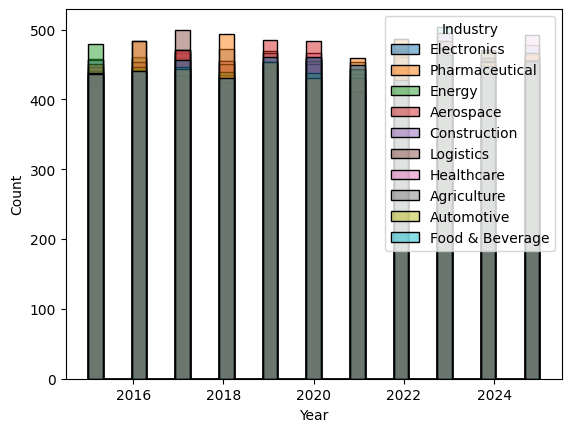

In [14]:
sns.histplot(df, x='Year',hue='Industry')

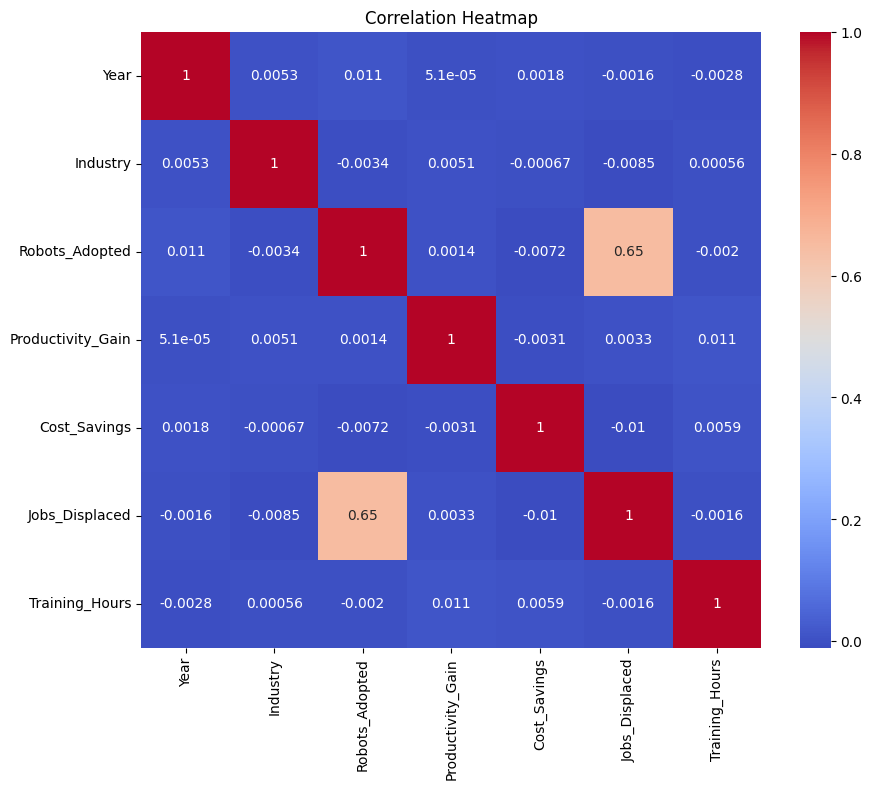

In [15]:
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])
print(df.head())

   Year  Industry  Robots_Adopted  Productivity_Gain  Cost_Savings  \
0  2016         4            7653              26.03        311.66   
1  2019         9            3434              12.52        475.41   
2  2024         5            6952              15.28        362.76   
3  2021         5            7967               5.07         24.15   
4  2022         4            6959              12.86        395.70   

   Jobs_Displaced  Training_Hours  
0            3226             183  
1            1244             396  
2            3200             396  
3             747             154  
4             279             300  


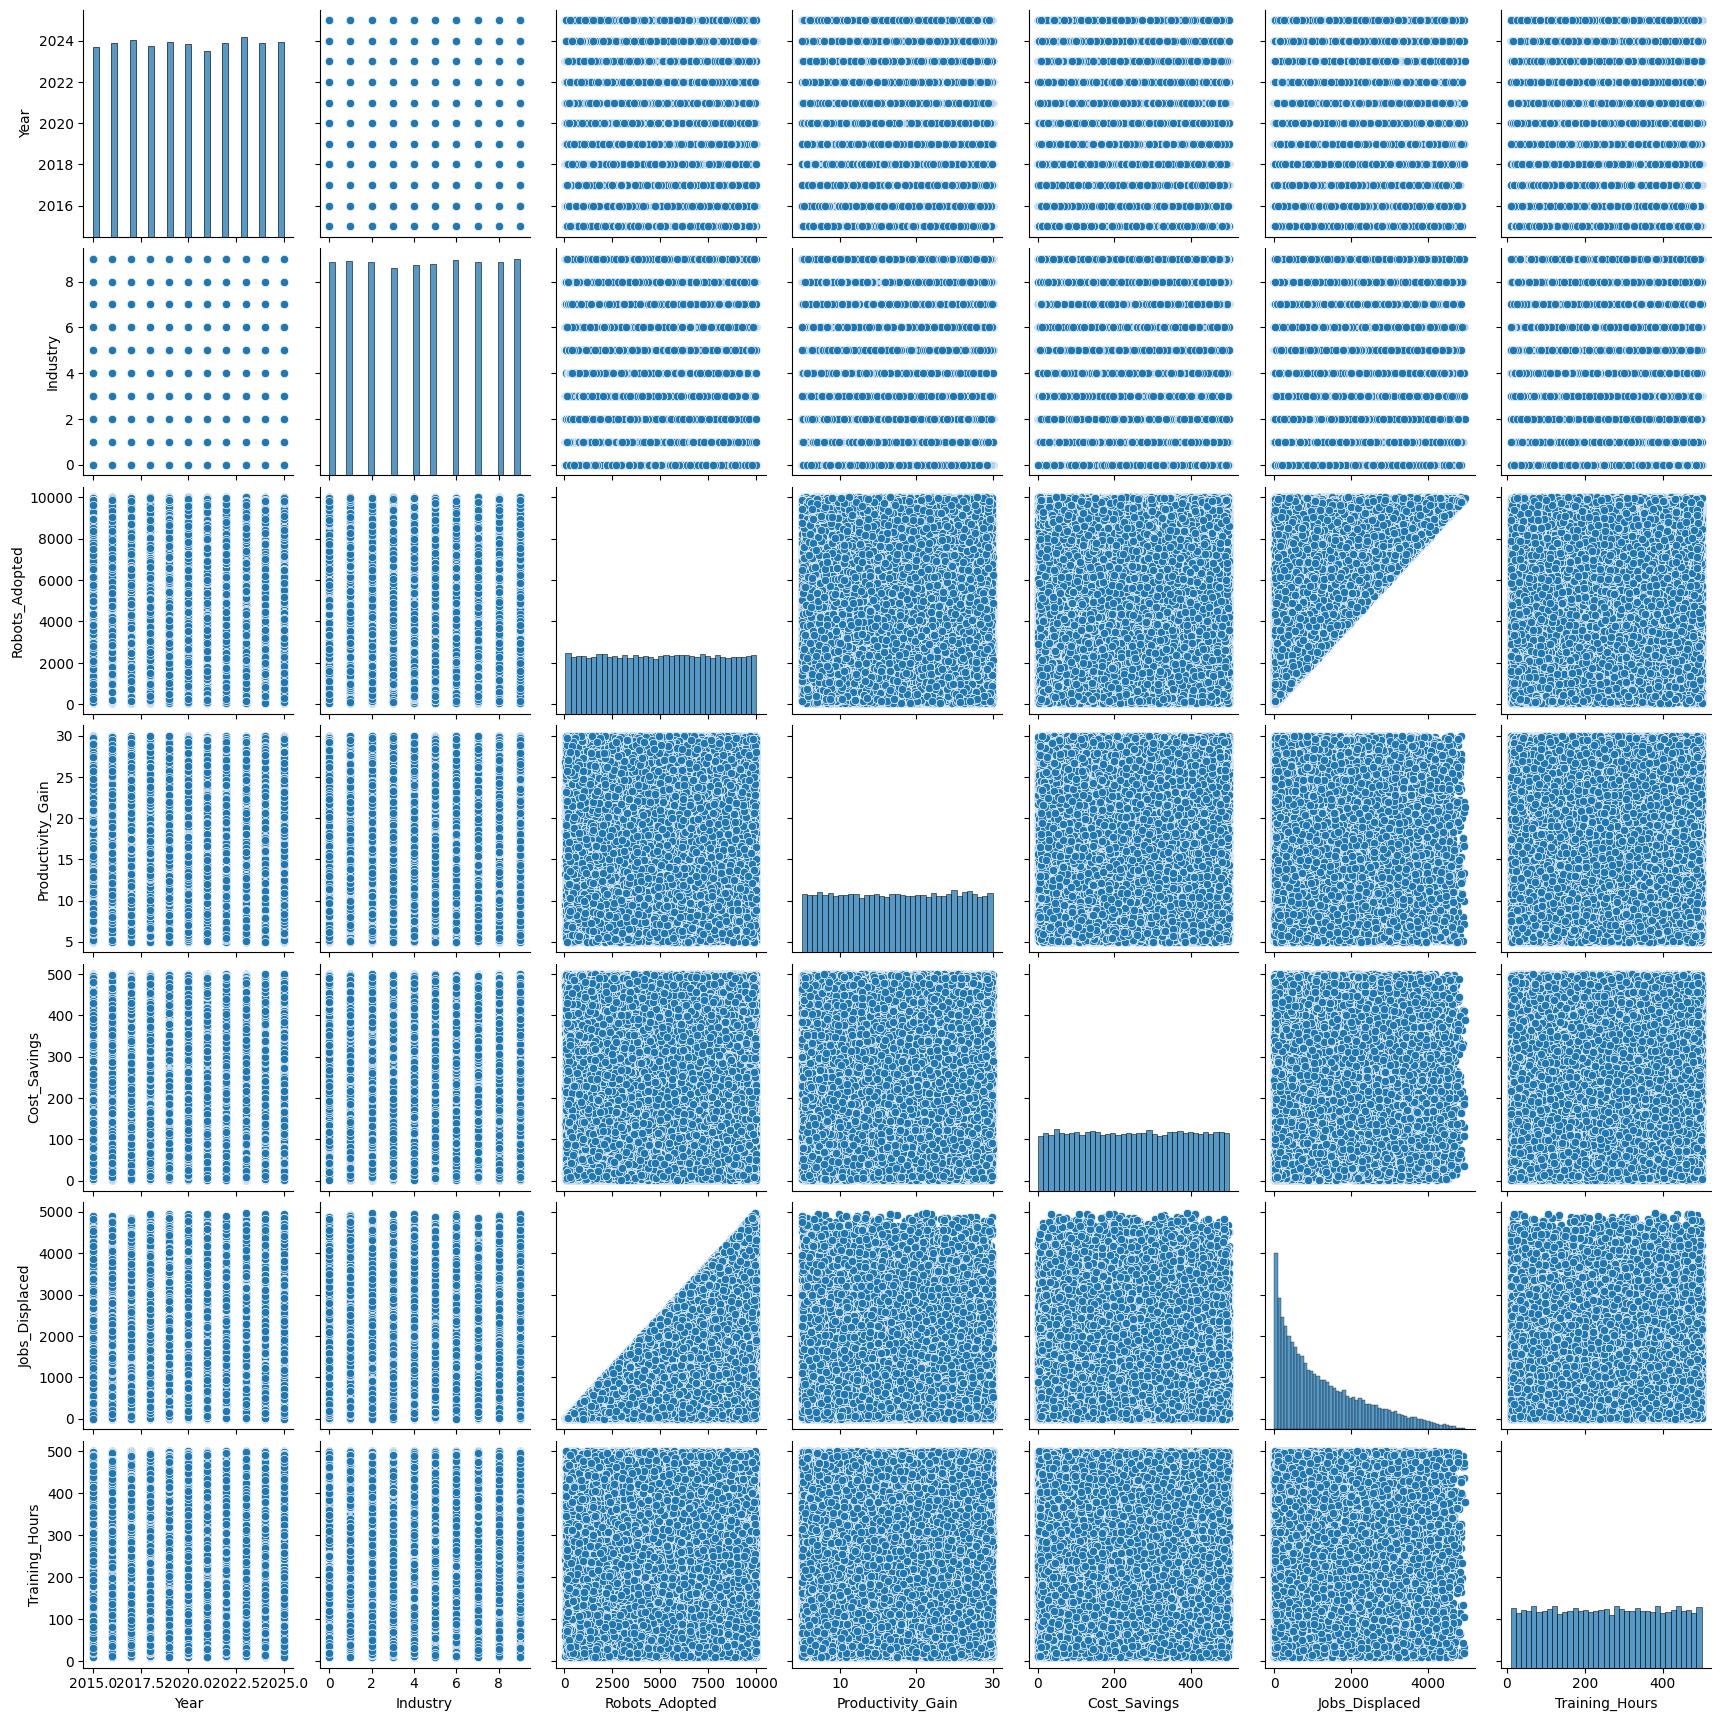

In [17]:
sns.pairplot(df.sample(50000))
plt.show()

In [18]:
X = df[['Year', 'Industry', 'Productivity_Gain', 'Cost_Savings', 'Jobs_Displaced', 'Training_Hours']]
y = df['Robots_Adopted']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
rf_model = RandomForestRegressor(n_estimators=999, random_state=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=999, random_state=100)

In [22]:
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Average CV R2 score: {np.mean(cv_scores)}")

Cross-validation R2 scores: [0.4304109  0.42859958 0.41521713 0.40585926 0.41026275]
Average CV R2 score: 0.4180699257058212


In [23]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MSE: 4763986.80, R2: 0.42


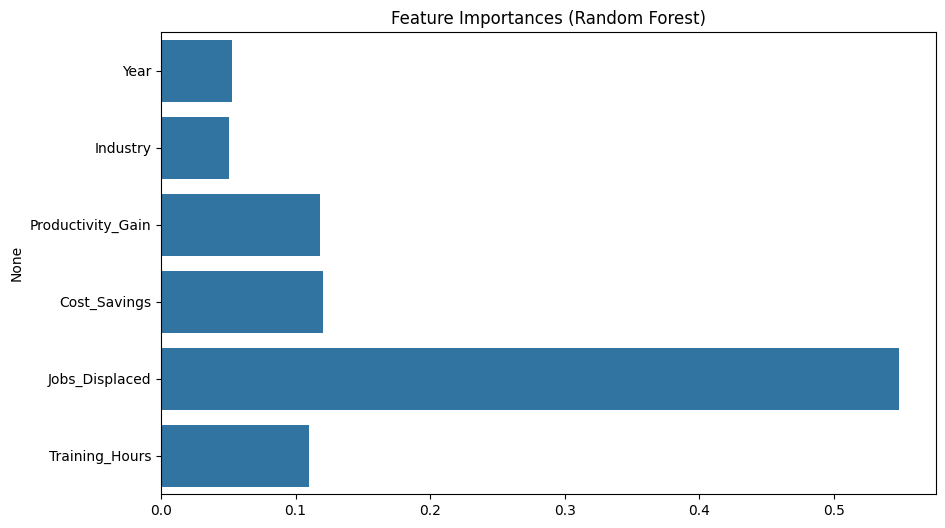

In [24]:
importances = rf_model.feature_importances_
features = df[['Year', 'Industry', 'Productivity_Gain', 'Cost_Savings', 'Jobs_Displaced', 'Training_Hours']].columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression - MSE: 4732737.18, R2: 0.43


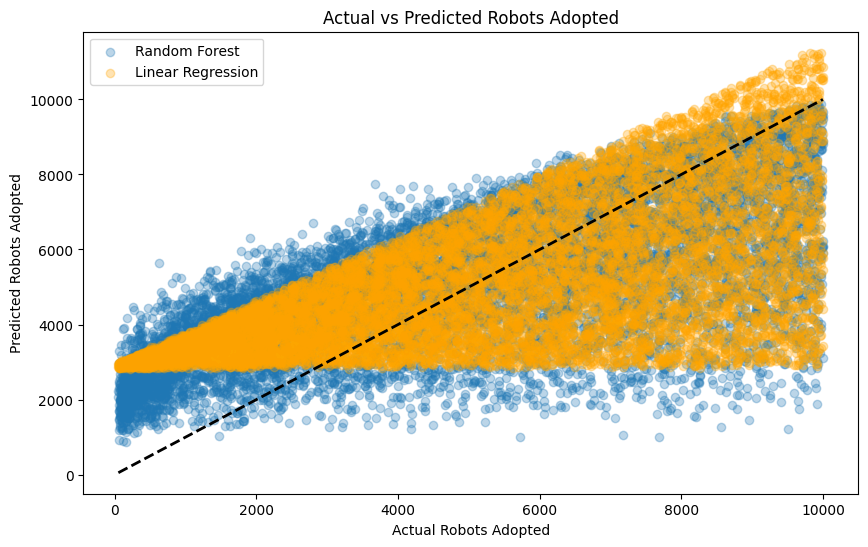

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Robots Adopted")
plt.ylabel("Predicted Robots Adopted")
plt.title("Actual vs Predicted Robots Adopted")
plt.legend()
plt.show()

In [27]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
inputs_full = df[['Year', 'Industry', 'Productivity_Gain', 'Cost_Savings', 'Jobs_Displaced', 'Training_Hours']]
targets_full = df['Robots_Adopted']

In [29]:
# Linear Regression
model_lr_full = LinearRegression().fit(inputs_full, targets_full)
predictions_lr_full = model_lr_full.predict(inputs_full)
loss_lr = rmse(targets_full, predictions_lr_full)
print('Full Linear Regression Loss (RMSE):', loss_lr)

Full Linear Regression Loss (RMSE): 2178.3132552712636


In [30]:
# Random Forest
model_rf_full = RandomForestRegressor().fit(inputs_full, targets_full)
predictions_rf_full = model_rf_full.predict(inputs_full)
loss_rf = rmse(targets_full, predictions_rf_full)
print('Full Random Forest Loss (RMSE):', loss_rf)

Full Random Forest Loss (RMSE): 823.4169348020843


### Example Input to Test the Model

In [31]:
example_input = np.array([[2025, 2, 20.0, 100.0, 50, 100]])
predicted_robots = model_rf_full.predict(example_input)
print('Predicted Robots Adopted (example):', predicted_robots)

Predicted Robots Adopted (example): [2654.97]


c:\users\madhav\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
